# Estimating the Entrance Length of Channel Flow

**Prepared by**: Stephen Cini (scini@nd.edu) and David Gazzo (dgazzo@nd.edu)


**Reference**: Problem 4.5, pg. 210, Transport Phenomena in Biological Systems by Truskey et al. (ISBN 978-0-13-156988-1)

**Intended Audience**: This problem is intended for Chemical and Biomolecular Engineering juniors and seniors from the University of Notre Dame who are either enrolled in or have taken Transport.

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Apply integration techniques to ordinary differential equations using Python.
* Properly graph and visualize data using `matplotlib`.
* Apply integration techniques to realistic scenarios using Python tools such as `scipy.integrate`.

## Coding Resources

Relevant Modules in Class Website:



*   [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)
*   [Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html)
*   [Lambda Functions](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-as-Arguments.html#lambda-functions)
*   [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)
*   [Scipy](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html#scipy)













In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Problem Statement:

<div class="admonition seealso"> 
<p class="title"><b>Homework Problem</b></p>
 Complete the following problem outside of class to practice the concepts discussed.
</div>

Developing flow within a channel can be examined with boundary layer theory. Consider a rectangular channel of height H and width w such that w >> H (Figure below). The velocity field in the entrance depends upon the x and y directions. As shown in the figure below, a boundary layer develops as flow enters the channel: Once the boundary layer has grown to equal H/2, the flow is fully developed.
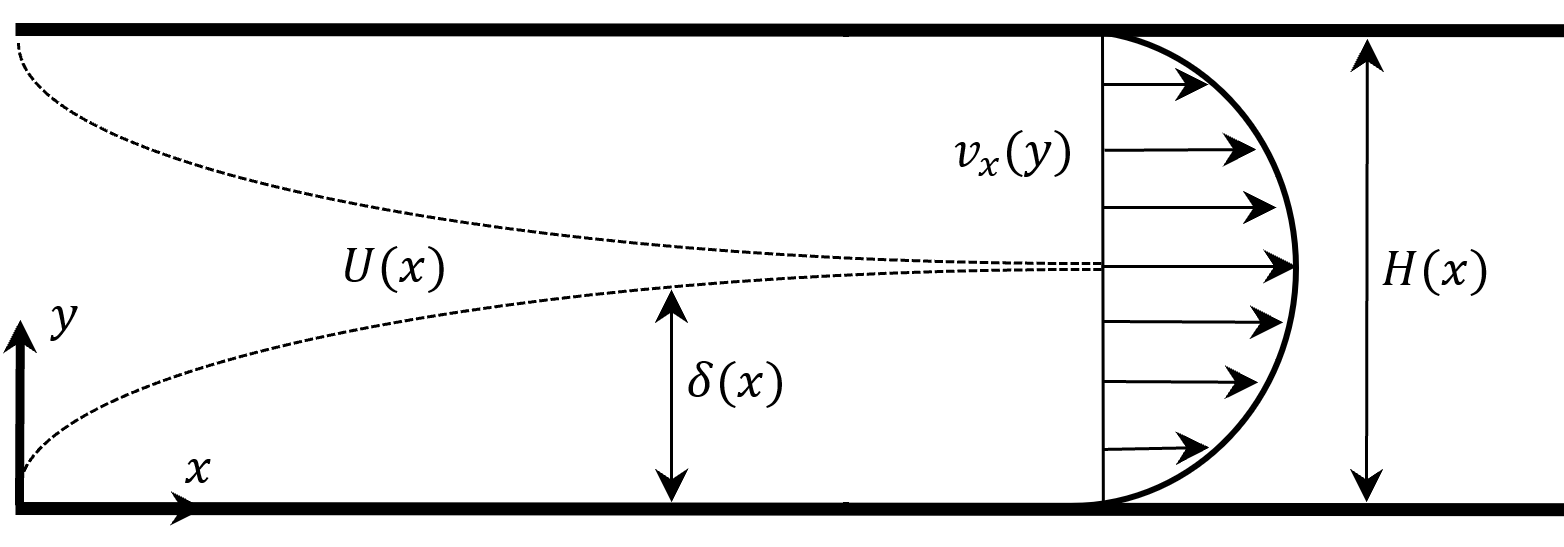

## 1. Estimating Entrance Length

As a first approximation, assume that the boundary layer is described by the results for flow over a flat plate. That is, the development of the boundary layer $δ$ is given by
\begin{equation}
δ(x)=5.00xRe_x^{-1/2}
\end{equation}

where,
\begin{equation}
 Re_x=ρUx/μ
\end{equation}

Develop an expression for the entrance length in terms of the channels Reynolds number, $Re_x=2ρUH/μ = 2ρQ/wμ$, where $〈v〉$ is the average velocity in the channel. 

Show that the entrance length $Le$ is equal to $0.005ReH$.

Submit your answer and written work via **Gradescope**.

## 2. More Accurate/Rigorous Method

### 2a. Normalize the expression on paper

The analysis in Question 1 assumes that $U(x) = U_o = 〈v〉$. But in fact, the free-stream velocity changes as the boundary layer grows in the channel. Therefore, assuming a linear velocity profile, $v_x=\frac{U_xy}{δ}$, in the boundary layer, and utilizing the von Karman momentum integral equation,

\begin{equation}
τ_w=ρ \frac{∂}{∂x} ∫_0^∞v_x (U-v_x )dy+ρ\frac{∂U}{∂x} ∫_0^∞(U-v_x )dy
\end{equation}

and the fact that the flow rate $Q$ is constant, the following expression for the growth of the boundary layer can be derived:

\begin{equation}
\frac{dδ_{(x)}}{dx}=\frac{6μW}{ρδ_{(x)}Q}\frac{[H-δ_{(x)}]^2}{H+4δ_{(x)}}
\end{equation}

Manipulate this expression so that it can be integrated numerically. Hint: normalize it and keep symmetry in mind. 

Submit your answer and written work via **Gradescope**.

### 2b. Numerically integrate the normalized expression

Using the normalized form of the differential equation, use `scipy.integrate` to numerically integrate the expression and find the value of x where $δ$ is fully developed.

For more information on how to use `scipy.integrate`, click [here](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html) to go to the relevant section, "7.9. Systems of Differential Equations and Scipy", of the class website.

In [2]:
def entrance(d, x, Re = 1): 
    '''Solving for the entrance length of the tube with non constant velocity
    Args:
        d: δ_star; Normalized δ; partial derivative wrt x or y (numpy array)
        x: x_star; Normalized x; position along channel (numpy array)
        Re: Reynolds number, constant dimensionless quantity used to show 
        turbulence or roughness of flow. Set to unity as default value
    Returns:
        dxdy: Normalized expression for the entrance length
        '''
    
    # assume Re is at unity for the example
  
### BEGIN SOLUTIONS
    dxdy = (Re*d/6)*((1+(2*d))/(2-d)**2)
### END SOLUTIONS

    return dxdy

In [3]:
# Integrate the solution in scipy using defined function

### BEGIN SOLUTIONS
dspan = [0, 1] # since del is dimensionless it will range from 0 to 1
  # where del of 0 is at the entrance of the tube and at a del of 1 is the
  # begining of fully developed flow
n = 300 # number of steps in linspace below
tspan = np.linspace(0, 1, n)
xo = [0] # we're starting at the entrance of the tube
soln = integrate.solve_ivp(entrance, dspan, xo, t_eval= tspan) # this is to solve our ode
d = soln.t
x = soln.y[0]
### END SOLUTIONS

### 2c. Plot the results
Plot the resulting data to show the behavior of the integrated expression. 

For more information on how to use `matplotlib` to make publication quality plots, click [here](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html#preparing-publication-quality-figures-in-python) to go to the relevant section, "1.15. Preparing Publication Quality Figures in Python", of the class website.

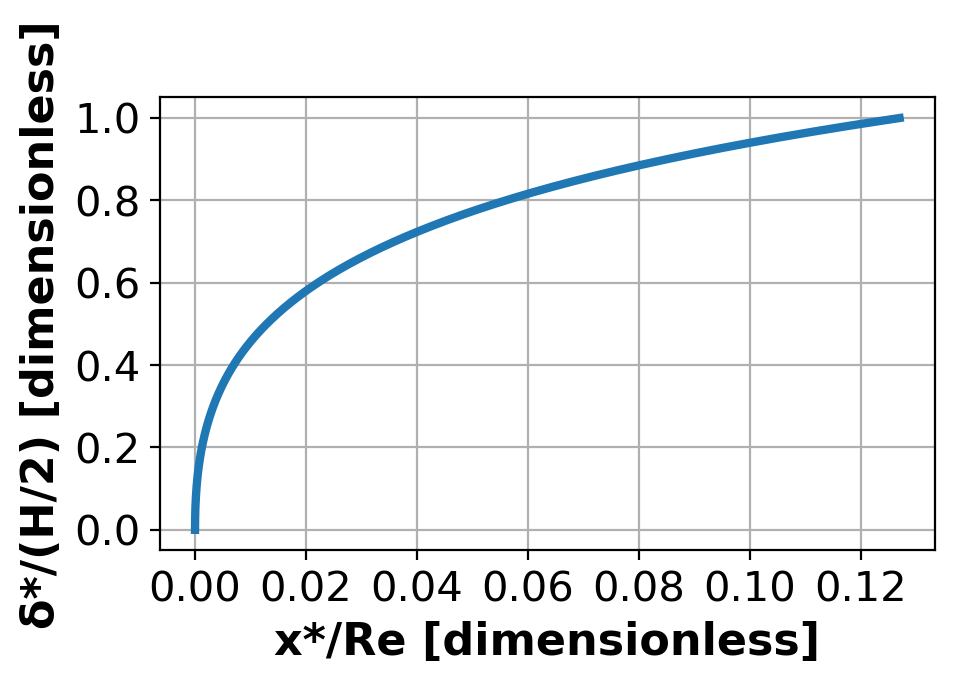

In [4]:
# Plot the integrated expression

fig = plt.figure(figsize=(5,3),dpi=200) # formats the plotted figure

### BEGIN SOLUTIONS
plt.plot(x, d, linewidth=3)
### END SOLUTIONS

# Format for publication quality
plt.xlabel('x*/Re [dimensionless]', fontsize=16,fontweight='bold')
plt.ylabel('\u03B4*/(H/2) [dimensionless]', fontsize=16,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

### 2d. Define the entrance length

At what value of x does the boundary layer become fully developed?

Hint: What is the coordinate where $δ$ = 1?

Store your solution as a numpy array labelled `Le`.

In [5]:
### BEGIN SOLUTIONS
Le = np.array(x[-1])
### END SOLUTIONS

# Print Value
print("Le (x @ δ*=1) =", Le) # we want to know the dimensionless
  # length at which del is 1 since this will give us our entrance length where
  # flow is stil developing    

Le (x @ δ*=1) = 0.12694690354738747


### 2e. Define an equation for Le using new value

Using the obtained value of `Le`, make a general expression for the entrance length similar to the expression derived in part 1.

*Hint*: The value obtained for Le is dimensionless.

Submit your answer and written work via **Gradescope**.

### 2f. Comparing integration methods

Compair your previous results using the `RK45` integration method with alternative methods.

Define your equation as `methods`.

For more information on other integration methods for `scipy.integrate`, click [here](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html) to go to the relevant section, "7.9. Systems of Differential Equations and Scipy", of the class website. Further detail into integration methods for `scipy.integrate`, is also provided [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [6]:
# make a list of methods
methods = ["RK23", "RK45", "DOP853"]

# loop through methods for best  
for i in methods:
    print("Using method",i)
    
### BEGIN SOLUTIONS
    other_methods = integrate.solve_ivp(entrance, dspan, xo, method=i, t_eval= tspan)
    d1 = other_methods.t
    x1 = other_methods.y[0]
    Le = np.array(x1[-1])
### END SOLUTIONS

# print values for each method within loop
# some solver statistics
    print("Number of RHS function evaluations:",other_methods.nfev)
# calculated length from each method
    print("Le (x @ δ*=1) =", Le)
    print("\n")

Using method RK23
Number of RHS function evaluations: 53
Le (x @ δ*=1) = 0.12693195882302588


Using method RK45
Number of RHS function evaluations: 38
Le (x @ δ*=1) = 0.12694690354738747


Using method DOP853
Number of RHS function evaluations: 89
Le (x @ δ*=1) = 0.12694710642481696




## 3. Discuss your results and analyze the data

### 3a.  Explain why the equation derived in Question 2e differs from the one obtained in Question 1.
**Discuss** in 1-3 sentences.

**Answer**:

### 3b.  Describe the integration methods used in 2f and how they differ in performance. Was the best method used originally in 2b? Why or why not?


**Discuss** in 3-5 sentences.

**Answer**:

### 3c. 	A Reynolds number of 1 was used as a starting point to simulate laminar flow. If the Reynolds number were increased, what would happen to the entrance length? Does it get larger or smaller? Why does this occur?

**Explain** your reasoning using the derived equations for `Le`and the nature of turbulence.
**Discuss** in 3-5 sentences.

**Answer**:


To visualize, plot the curve above with the following values of Re:

1, 10, 100, 500, 1000, 5000.

*Hints*:

1.    Use a [lambda function](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-as-Arguments.html#lambda-functions) to allow redefinition of Re.

2.   Make a semi-log plot for easier viewing of trend in results.


Le (x @ δ*=1) for Re = 1 = 0.12694690354738747
Le (x @ δ*=1) for Re = 10 = 1.2695003130784555
Le (x @ δ*=1) for Re = 100 = 12.695115409153276
Le (x @ δ*=1) for Re = 500 = 63.47563865495485
Le (x @ δ*=1) for Re = 1000 = 126.95129304465897
Le (x @ δ*=1) for Re = 5000 = 634.7565284345559


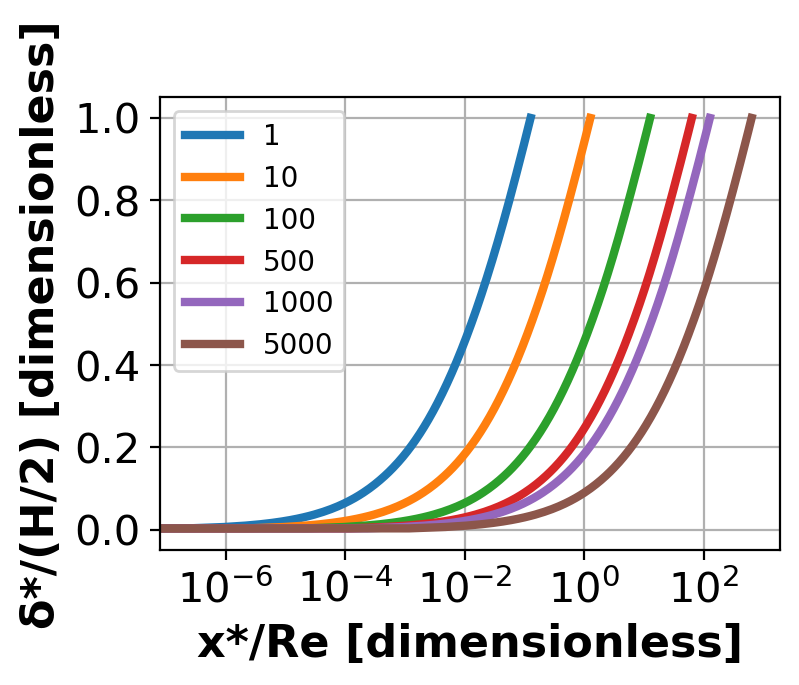

In [7]:
# Redefine Re in same function from before within a for loop.

### BEGIN SOLUTIONS
dspan = [0, 1] # range of normalized d*
Mult_Re = np.array([1, 10, 100, 500, 1000, 5000]) # values from above in array
n = 300 # number of steps in linspace below
tspan = np.linspace(0, 1, n)
xo = [0] # we're starting at the entrance of the tube
### END SOLUTIONS

fig = plt.figure(figsize=(4,3),dpi=200) # formats the plotted figure to be larger and clearer

# loop the integration for different values of Re
# plot each iteration inside loop

for i in range(len(Mult_Re)):

### BEGIN SOLUTIONS
    re = Mult_Re[i]
    e_Re_lambda = lambda x, d: entrance(x, d, Re = re)
    soln = integrate.solve_ivp(e_Re_lambda, dspan, xo, t_eval= tspan) #this is to solve our ode
    d = soln.t # d = independent variable
    x = soln.y[0] # x = dependent variable solution
   # Use semilogx
    plt.semilogx(x, d, linewidth=3, label = Mult_Re[i]) #we want the normalized x axis to see where d crosses 1.
    Le = np.array(x[n-1])
    print("Le (x @ δ*=1) for Re =", Mult_Re[i], "=", Le)
### END SOLUTIONS

# labels and publication quality details
plt.xlabel('x*/Re [dimensionless]', fontsize=16,fontweight='bold')
plt.ylabel('\u03B4*/(H/2) [dimensionless]', fontsize=16,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend();